In [8]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as ipd
import numpy as np
import pandas as pd
import librosa
from librosa import display

In [6]:
source_file="C:\\Users\\ril\\Downloads\\manishankar-rec.wav"
target_file="C:\\Users\\ril\\Downloads\\mani shankar.wav"

In [4]:
audio_file_path="C:\\Users\\ril\\Downloads\\manishankar-rec.wav"
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [6]:
audio_file_path1="C:\\Users\\ril\\Downloads\\mani shankar.wav"
librosa_audio_data1,librosa_sample_rate1=librosa.load(audio_file_path1)

In [8]:

correlate_result = np.correlate(librosa_audio_data, librosa_audio_data1, 'full')
b_shift_positions = np.arange(-len(librosa_audio_data) + 1, len(librosa_audio_data1))
print(b_shift_positions) # The shift positions of b
print(correlate_result)

[-64826 -64825 -64824 ...  32279  32280  32281]
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.0067734e-20 1.2102872e-20
 1.0722101e-21]


In [18]:
from scipy.signal import fftconvolve
def similarity(template, test):
    corr = fftconvolve(template, test, mode='same')           
    return max(abs(corr))

In [19]:
similarity(librosa_audio_data, librosa_audio_data1)

11.240025

In [20]:
def similarity1(template, test):
    corr = fftconvolve(template, test, mode='same')           
    return corr

In [22]:
x=similarity1(librosa_audio_data, librosa_audio_data1)

In [11]:
import librosa
import matplotlib.pyplot as plt
from dtw import dtw

#Loading audio files
y1, sr1 = librosa.load(source_file) 
y2, sr2 = librosa.load(target_file) 


Populating the interactive namespace from numpy and matplotlib


C:\Users\ril\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['display']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +
<ipython-input-12-3d8704c6a563>:4: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0367661e-04 1.1228465e-04
 8.1096157e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc1 = librosa.feature.mfcc(y1, sr1)
<ipython-input-12-3d8704c6a563>:8: FutureWarning: Pass y=[1.3221467e-17 1.3093474e-16 4.9262708e-17 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc2 = librosa.feature.mfcc(y2, sr2)


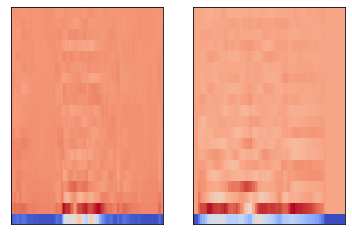

In [12]:
%pylab inline

subplot(1, 2, 1)
mfcc1 = librosa.feature.mfcc(y1, sr1)
librosa.display.specshow(mfcc1)

subplot(1, 2, 2)
mfcc2 = librosa.feature.mfcc(y2, sr2)
librosa.display.specshow(mfcc2)

In [14]:
from numpy.linalg import norm
dist, cost, acc_cost, path = dtw(mfcc1.T, mfcc2.T, dist=lambda x, y: norm(x - y, ord=1))
print('Normalized distance between the two sounds:', dist)

Normalized distance between the two sounds: 36777.53421020508


(-0.5, 63.5)

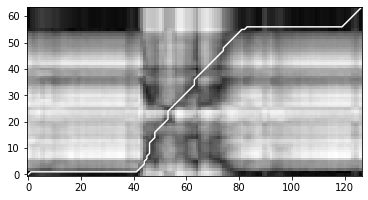

In [15]:

imshow(cost.T, origin='lower', cmap=cm.gray, interpolation='nearest')
plot(path[0], path[1], 'w')
xlim((-0.5, cost.shape[0]-0.5))
ylim((-0.5, cost.shape[1]-0.5))

In [16]:
!pip install difflib

ERROR: Could not find a version that satisfies the requirement difflib (from versions: none)
ERROR: No matching distribution found for difflib


In [ ]:
from difflib import SequenceMatcher

threshold = 0.8

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

def compare_audio(file1, file2):

    file1 = open(“file1”, "rb").read()
    file2 = open(“file2”, "rb").read()
 
    sim_ratio = similar(file1, file2)
    
    if sim_ratio > threshold:
        print('Same')
    else:
        print('Different')